<h1> Housing Price Prediction </h1>
<ul>
<li> Data Taken From <a href= 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'> Handson Ed2 </a></li>
<li>Linear Regression Problem on Predicting the housing prices</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#reading the data in dataframe
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#info of all the rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

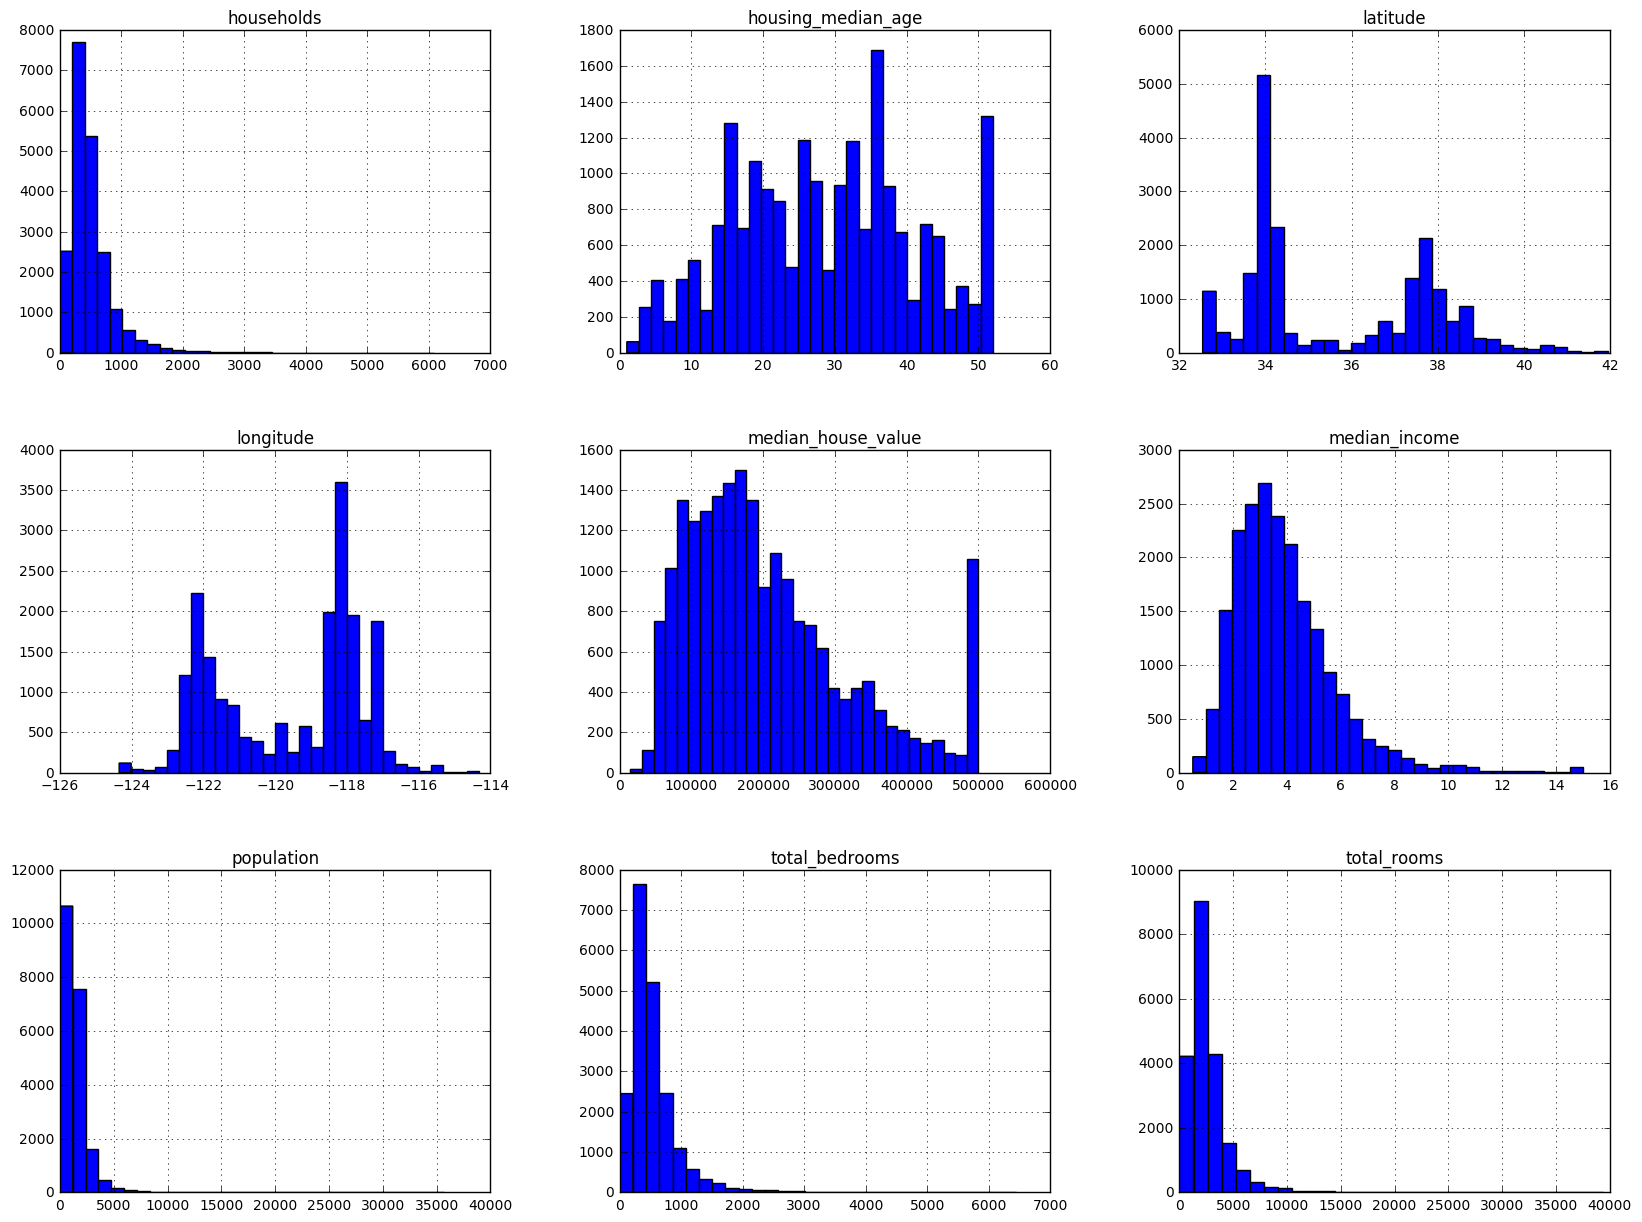

In [5]:
%matplotlib inline
df.hist(bins = 30, figsize = (20,15))
plt.show()

In [6]:
#creating test and train set with 0.8/0.2 rule
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

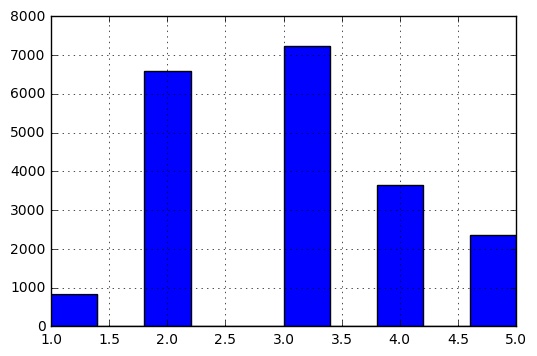

In [7]:
#dividing the median_income in 5 categories to avoid bias of median_income in test and train set
df['income_category'] = pd.cut(df['median_income'], bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4, 5])
df['income_category'].hist()

In [8]:
#stratified sampling to avoid bias on income category
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df, df["income_category"]):
    strat_train_set = df.loc[train_idx]
    strat_test_set = df.loc[test_idx]
    
#check the proportion of test and train set
prop_test = strat_test_set["income_category"].value_counts() / len(strat_test_set)
prop_train = strat_train_set["income_category"].value_counts() / len(strat_train_set)
print(prop_test)
print(prop_train)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64
3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_category, dtype: float64


In [9]:
for set in (strat_train_set, strat_test_set):
    set.drop('income_category', axis = 1, inplace = True)

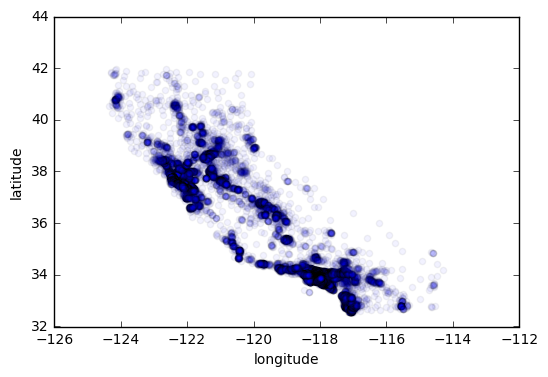

In [10]:
#visualizing the data by lattitude and longitude
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.05)
#density of the location can be observed from below graph

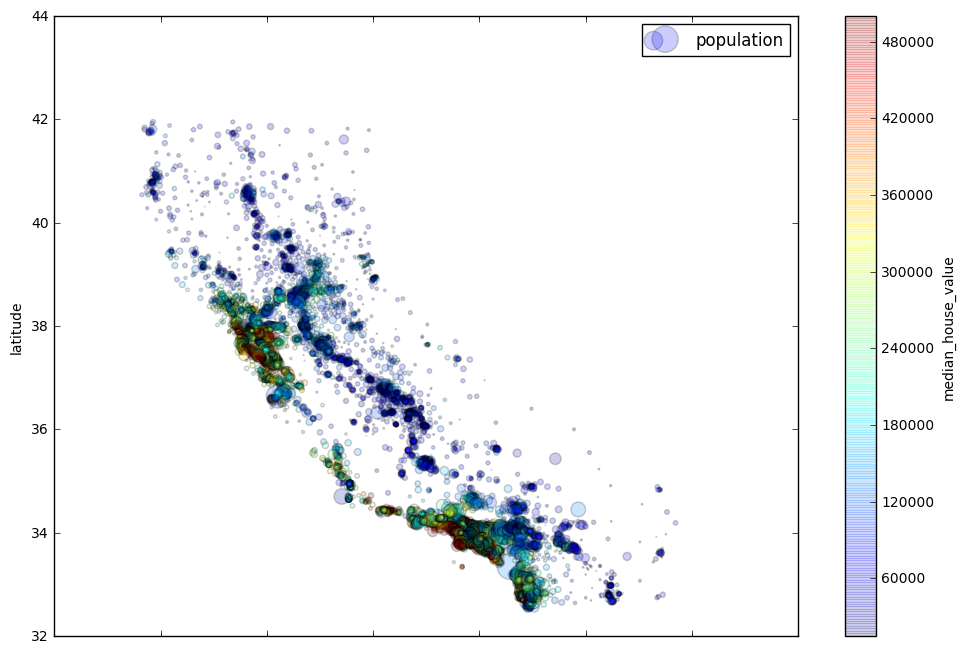

In [11]:
#more informative visulatzation with size of marker depicting population and color for house values
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.2, s = df['population']/100, label = 'population',
       figsize = (12,8), c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)
plt.legend()
#one can infer that prices are related 

In [12]:
#checking the correlation of all the attritubes with median_house_value
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000019A26A6208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000019A211FC18>]], dtype=object)

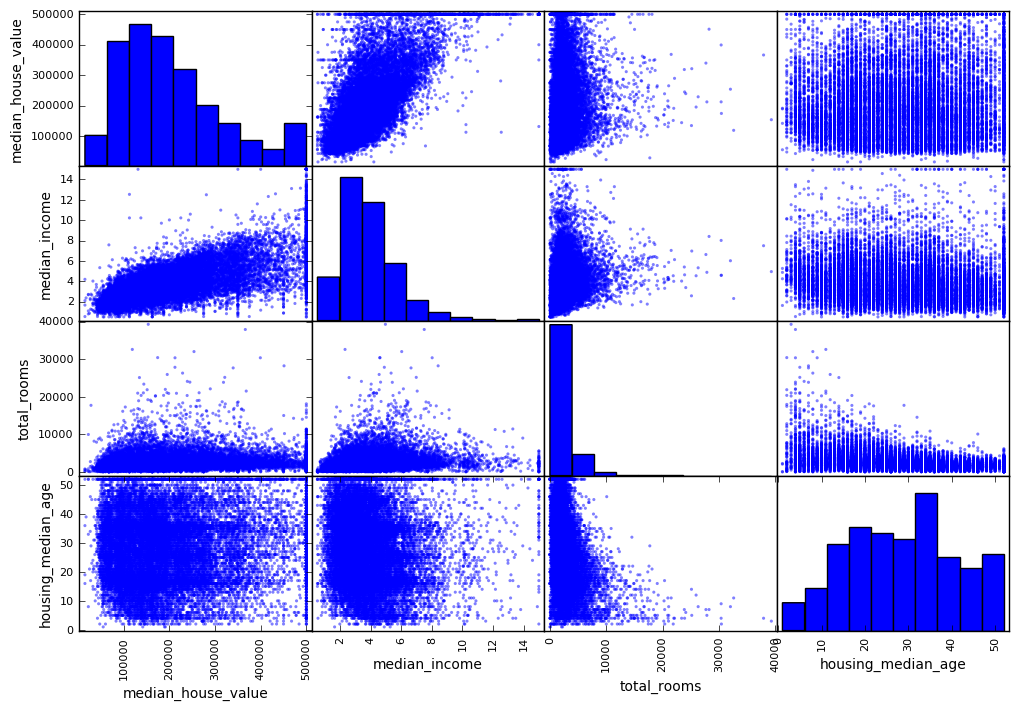

In [13]:
#plotting scatter_matrix to understand the correlation 
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))